<a href="https://colab.research.google.com/github/Ishwarya2107/WindPowerForecasting/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install json
import requests
import json

api_key = "443182c924d37ea42547cbd6bfc5faf8"


latitude = 26.920860
longitude = -80.088188


endpoint = "https://api.openweathermap.org/data/2.5/onecall"


params = {
    "lat": latitude,
    "lon": longitude,
    "date":2023-11-13,
    "exclude": "minutely,daily",
    "appid": api_key,
}


response = requests.get(endpoint, params=params)

if response.status_code == 200:
    data = json.loads(response.text)

    print(data)
    wind_speed = []
    wind_direction = []
    for i in range(48):
      wind_speed.append(data['hourly'][i]['wind_speed'])
      wind_direction.append(data['hourly'][i]['wind_deg'])
    print(wind_speed)
    print(wind_direction)



ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
{'lat': 26.9209, 'lon': -80.0882, 'timezone': 'America/New_York', 'timezone_offset': -18000, 'current': {'dt': 1699983060, 'sunrise': 1699961959, 'sunset': 1700001023, 'temp': 298.59, 'feels_like': 299.3, 'pressure': 1017, 'humidity': 81, 'dew_point': 295.09, 'uvi': 3.33, 'clouds': 100, 'visibility': 10000, 'wind_speed': 4.92, 'wind_deg': 75, 'wind_gust': 10.73, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}]}, 'hourly': [{'dt': 1699981200, 'temp': 298.66, 'feels_like': 299.33, 'pressure': 1017, 'humidity': 79, 'dew_point': 294.75, 'uvi': 3.43, 'clouds': 100, 'visibility': 10000, 'wind_speed': 10.35, 'wind_deg': 88, 'wind_gust': 11.97, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'pop': 1, 'rain': {'1h': 0.78}}, {'dt': 1699984800, 'temp': 298.59, 'feels_like': 299.3, 

In [ ]:
print(len(wind_speed))
print(len(wind_direction))

48
48


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.DataFrame(list(zip(wind_speed, wind_direction)),
               columns =['Wind Speed (m/s)', 'Wind Direction (°)'])
df

,Wind Speed (m/s),Wind Direction (°)
0,10.35,88
1,10.70,87
2,10.57,86
3,10.69,84
4,10.51,84
5,10.68,84
6,10.64,83
7,11.01,84
8,11.12,85
9,11.14,86


In [ ]:
data=pd.read_csv('/content/Wind_power_data.csv',index_col=['Date/Time'], on_bad_lines='skip')

In [ ]:
data

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500


In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50530 entries, 01 01 2018 00:00 to 31 12 2018 23:50
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LV ActivePower (kW)            50530 non-null  float64
 1   Wind Speed (m/s)               50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 3   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4)
memory usage: 1.9+ MB


In [ ]:
x=data.drop('Theoretical_Power_Curve (KWh)', axis=1)
y=data['Theoretical_Power_Curve (KWh)']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df is your DataFrame
# Perform steps 1 and 2

# Step 3: Data Splitting with a specified random state
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=random_state
)

# Step 4: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)


# Step 6: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

Mean Squared Error: 115039.5891396786
Mean Absolute Error: 227.05550594757477
R-squared: 0.9380227802143415
0.9391598275973636
0.9380227802143415


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming df is your DataFrame
# Perform steps 1 and 2

# Define the model
model = LinearRegression()

# Define scoring functions
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Perform cross-validated scoring
mse_scores = cross_val_score(model, x, y, cv=5, scoring=mse_scorer)
mae_scores = cross_val_score(model, x, y, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(model,  x, y, cv=5, scoring=r2_scorer)

# Print the results
print(f'Cross-validated MSE: {np.mean(mse_scores)}')
print(f'Cross-validated MAE: {np.mean(mae_scores)}')
print(f'Cross-validated R-squared: {np.mean(r2_scores)}')


Cross-validated MSE: 132903.20590261096
Cross-validated MAE: 235.39729338337983
Cross-validated R-squared: 0.9284859131961222


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame
# Perform steps 1 and 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

# Define the pipeline with StandardScaler and RandomForestRegressor
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# Define the hyperparameters to tune
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 150],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    # Add other hyperparameters as needed
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for predictions
y_preds_tuned = best_model.predict(X_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_preds_tuned)
mae_tuned = mean_absolute_error(y_test, y_preds_tuned)
r2_tuned = r2_score(y_test, y_preds_tuned)

print(f'Tuned Model - Mean Squared Error: {mse_tuned}')
print(f'Tuned Model - Mean Absolute Error: {mae_tuned}')
print(f'Tuned Model - R-squared: {r2_tuned}')

# Evaluate the tuned model using model.score() on both training and testing sets
train_score_tuned = best_model.score(X_train, y_train)*100
test_score_tuned = best_model.score(X_test, y_test)*100

print(f'Tuned Model - Training R-squared: {train_score_tuned}')
print(f'Tuned Model - Testing R-squared: {test_score_tuned}')


Best Hyperparameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 100}
Tuned Model - Mean Squared Error: 0.1718543437117852
Tuned Model - Mean Absolute Error: 0.20034511397822713
Tuned Model - R-squared: 0.9999999200972678
Tuned Model - Training R-squared: 99.99999855527867
Tuned Model - Testing R-squared: 99.99999200972678


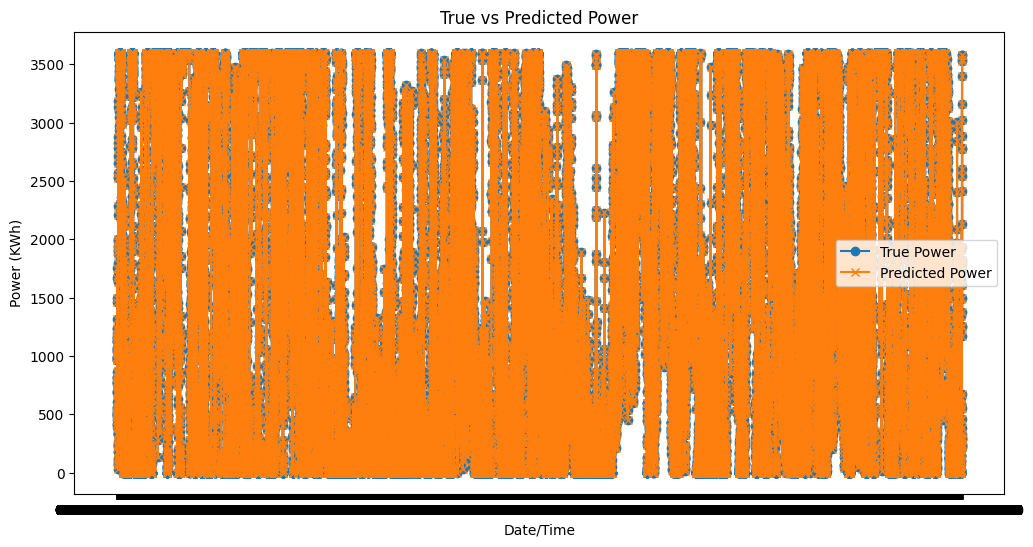

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Date/Time' as the index
data.loc[:, 'y_preds'] = best_model.predict(x)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Theoretical_Power_Curve (KWh)'], label='True Power', marker='o')
plt.plot(data.index, data['y_preds'], label='Predicted Power', marker='x')
plt.xlabel('Date/Time')
plt.ylabel('Power (KWh)')
plt.title('True vs Predicted Power')
plt.legend()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50530 entries, 01 01 2018 00:00 to 31 12 2018 23:50
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LV ActivePower (kW)            50530 non-null  float64
 1   Wind Speed (m/s)               50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 3   Wind Direction (°)             50530 non-null  float64
 4   y_preds                        50530 non-null  float64
dtypes: float64(5)
memory usage: 4.3+ MB


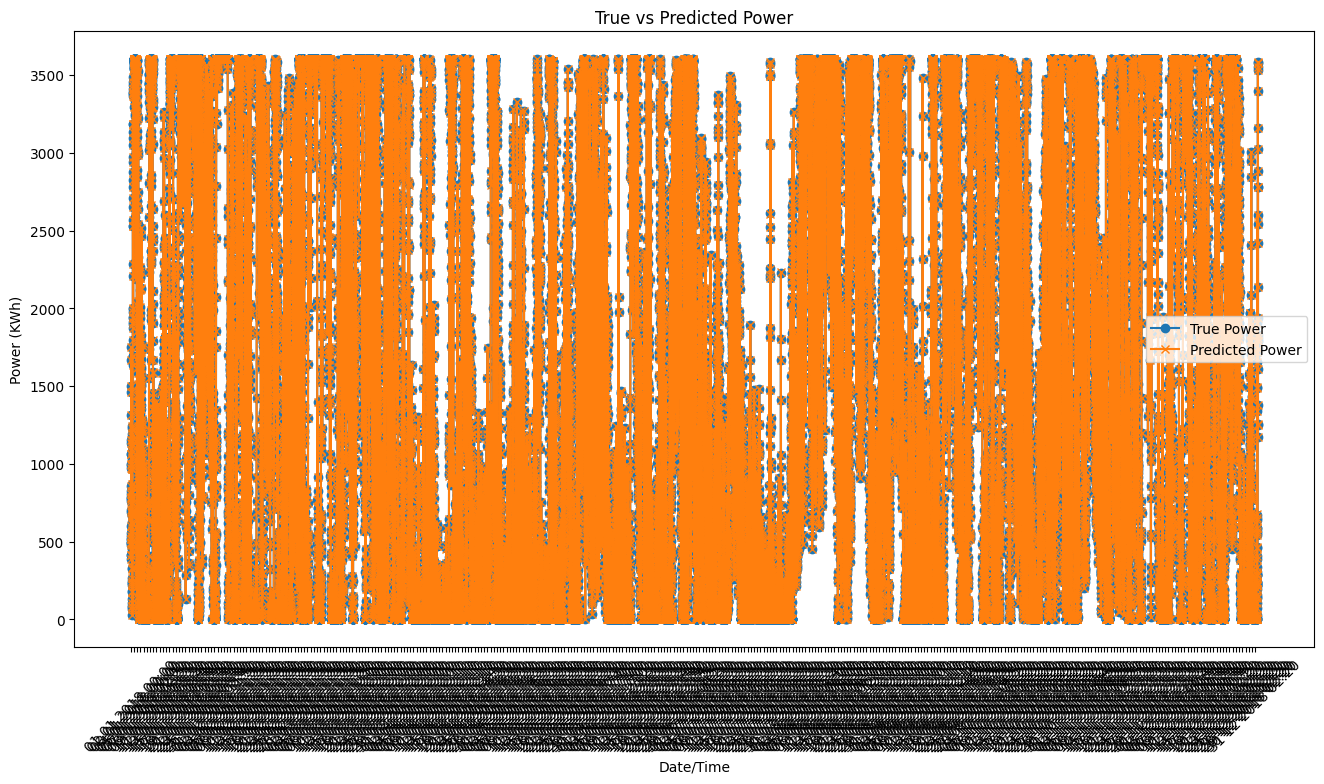

In [ ]:
# Assuming 'Date/Time' is your index
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Theoretical_Power_Curve (KWh)'], label='True Power', marker='o')
plt.plot(data.index, data['y_preds'], label='Predicted Power', marker='x')
plt.xlabel('Date/Time')
plt.ylabel('Power (KWh)')
plt.title('True vs Predicted Power')
plt.xticks(data.index[::144], rotation=45)  # Show every 12th tick label with a 45-degree rotation
plt.legend()
plt.show()


For a single windturbine:

Siemens Gamesa SG 5.8-170: 5,800 kW (5.8 MW)

Vestas V150-5.6 MW: 5,600 kW (5.6 MW)

General Electric (GE) 2.7-120: 2,700 kW (2.7 MW)

Nordex N149/4.0-4.5: Ranges from 4,000 kW to 4,500 kW (4.0 MW to 4.5 MW)

Suzlon S66: 1,250 kW (1.25 MW)

In [ ]:
import joblib

# Assuming best_model is your trained model
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [ ]:
import joblib

# Load the model from file
loaded_model = joblib.load('best_model.pkl')


In [ ]:
df=df.drop('LV ActivePower (kW)', axis=1)

In [ ]:
Siemens_Gamesa_SG['Wind Direction (°)']=df['Wind Direction (°)']
Siemens_Gamesa_SG['Wind Speed (m/s)']= df['Wind Speed (m/s)']
Siemens_Gamesa_SG['LV ActivePower (kW)']=580000
Siemens_Gamesa_SG

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,5800,10.35,88,2991.880026
1,5800,10.70,87,3156.763822
2,5800,10.57,86,3098.524074
3,5800,10.69,84,3152.525358
4,5800,10.51,84,3070.461013
5,5800,10.68,84,3147.045763
6,5800,10.64,83,3131.004865
7,5800,11.01,84,3276.323216
8,5800,11.12,85,3313.492662
9,5800,11.14,86,3320.261352


In [ ]:
Vestas['Wind Direction (°)']=df['Wind Direction (°)']
Vestas['Wind Speed (m/s)']=df['Wind Speed (m/s)']
Vestas['LV ActivePower (kW)']=
Vestas

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,560,10.35,88,2991.880026
1,560,10.70,87,3156.763822
2,560,10.57,86,3098.524074
3,560,10.69,84,3152.525358
4,560,10.51,84,3070.461013
5,560,10.68,84,3147.045763
6,560,10.64,83,3131.004865
7,560,11.01,84,3276.323216
8,560,11.12,85,3313.492662
9,560,11.14,86,3320.261352


In [ ]:
General_Electric['Wind Direction (°)']=df['Wind Direction (°)']
General_Electric['Wind Speed (m/s)']=df['Wind Speed (m/s)']
General_Electric['LV ActivePower (kW)']=270000
General_Electric

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,27000,10.35,88,2991.880026
1,27000,10.70,87,3156.763822
2,27000,10.57,86,3098.524074
3,27000,10.69,84,3152.525358
4,27000,10.51,84,3070.461013
5,27000,10.68,84,3147.045763
6,27000,10.64,83,3131.004865
7,27000,11.01,84,3276.323216
8,27000,11.12,85,3313.492662
9,27000,11.14,86,3320.261352


In [ ]:
Nordex['Wind Direction (°)']=df['Wind Direction (°)']
Nordex['Wind Speed (m/s)']=df['Wind Speed (m/s)']
Nordex['LV ActivePower (kW)']=45
Nordex

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,45,10.35,88,2991.880026
1,45,10.70,87,3156.763822
2,45,10.57,86,3098.524074
3,45,10.69,84,3152.525358
4,45,10.51,84,3070.461013
5,45,10.68,84,3147.045763
6,45,10.64,83,3131.004865
7,45,11.01,84,3276.323216
8,45,11.12,85,3313.492662
9,45,11.14,86,3320.261352


In [ ]:
Suzlon['Wind Direction (°)']=df['Wind Direction (°)']
Suzlon['Wind Speed (m/s)']= df['Wind Speed (m/s)']
Suzlon['LV ActivePower (kW)']=125
Suzlon

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,125,10.35,88,2991.880026
1,125,10.70,87,3156.763822
2,125,10.57,86,3098.524074
3,125,10.69,84,3152.525358
4,125,10.51,84,3070.461013
5,125,10.68,84,3147.045763
6,125,10.64,83,3131.004865
7,125,11.01,84,3276.323216
8,125,11.12,85,3313.492662
9,125,11.14,86,3320.261352


In [ ]:
# Assuming X_train is the original feature matrix used for training
Siemens_Gamesa_SG = Siemens_Gamesa_SG[X_train.columns]
Vestas = Vestas[X_train.columns]
General_Electric = General_Electric[X_train.columns]
Nordex = Nordex[X_train.columns]  # Corrected the name from Noordexx to Nordex
Suzlon = Suzlon[X_train.columns]

# Make predictions for each dataset
y_preds_SGSG = best_model.predict(Siemens_Gamesa_SG)
y_preds_Vestas = best_model.predict(Vestas)
y_preds_GE = best_model.predict(General_Electric)
y_preds_Nordex = best_model.predict(Nordex)
y_preds_Suzlon = best_model.predict(Suzlon)


In [ ]:
Siemens_Gamesa_SG['Theoretical_Power_Curve (KWh)']=y_preds_SGSG
Vestas['Theoretical_Power_Curve (KWh)']=y_preds_Vestas
General_Electric['Theoretical_Power_Curve (KWh)']=y_preds_GE
Nordex['Theoretical_Power_Curve (KWh)']=y_preds_Nordex
Suzlon['Theoretical_Power_Curve (KWh)']=y_preds_Suzlon

In [ ]:
Nordex


,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,45,10.35,88,2991.647472
1,45,10.70,87,3156.619810
2,45,10.57,86,3097.932816
3,45,10.69,84,3152.362620
4,45,10.51,84,3070.419763
5,45,10.68,84,3147.207392
6,45,10.64,83,3130.427568
7,45,11.01,84,3276.568853
8,45,11.12,85,3313.422810
9,45,11.14,86,3320.108220


In [ ]:
Suzlon

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,125,10.35,88,2991.647472
1,125,10.70,87,3156.619810
2,125,10.57,86,3097.932816
3,125,10.69,84,3152.362620
4,125,10.51,84,3070.419763
5,125,10.68,84,3147.207392
6,125,10.64,83,3130.427568
7,125,11.01,84,3276.568853
8,125,11.12,85,3313.422810
9,125,11.14,86,3320.108220


In [ ]:
Siemens_Gamesa_SG

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,5800,10.35,88,2991.880026
1,5800,10.70,87,3156.763822
2,5800,10.57,86,3098.524074
3,5800,10.69,84,3152.525358
4,5800,10.51,84,3070.461013
5,5800,10.68,84,3147.045763
6,5800,10.64,83,3131.004865
7,5800,11.01,84,3276.323216
8,5800,11.12,85,3313.492662
9,5800,11.14,86,3320.261352


In [ ]:
Siemens_Gamesa_SG['Theoretical_Power_Curve (KWh)']==Nordex['Theoretical_Power_Curve (KWh)']